## Linear Regression credit card and bank balances
---
**Elo notes**

The task is to predict an individual's balance based on various variables

### Variance inflation factor

In statistics, the variance inflation factor (VIF) quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.


$Y = β0 + β1 X1 + β2 X 2 + ... + βk Xk + ε.$

The standard error of the estimate of βj is the square root of the $j+1, j+1$ element of $s2(X′X)−1$, where s is the root mean squared error (RMSE) (note that RMSE2 is an unbiased estimator of the true variance of the error term, $ {\displaystyle \sigma ^{2}}$; $X$ is the regression design matrix — a matrix such that Xi, j+1 is the value of the jth independent variable for the ith case or observation, and such that Xi, 1 equals 1 for all i. It turns out that the square of this standard error, the estimated variance of the estimate of βj, can be equivalently expressed as[citation needed]

$ {\displaystyle {\rm {\widehat {var}}}({\hat {\beta }}_{j})={\frac {s^{2}}{(n-1){\widehat {\rm {var}}}(X_{j})}}\cdot {\frac {1}{1-R_{j}^{2}}}}$

where $Rj2$ is the multiple $R2$ for the regression of $Xj$ on the other covariates (a regression that does not involve the response variable $Y$). This identity separates the influences of several distinct factors on the variance of the coefficient estimate:

$s2$: greater scatter in the data around the regression surface leads to proportionately more variance in the coefficient estimates

$n$: greater sample size results in proportionately less variance in the coefficient estimates

${\displaystyle {\widehat {\rm {var}}}(X_{j})} $: greater variability in a particular covariate leads to proportionately less variance in the corresponding coefficient estimate

The remaining term, $1 / (1 − Rj2$) is the $VIF$. It reflects all other factors that influence the uncertainty in the coefficient estimates. The VIF equals 1 when the vector $X_j$ is orthogonal to each column of the design matrix for the regression of $X_j$ on the other covariates. By contrast, the VIF is greater than 1 when the vector $X_j$ is not orthogonal to all columns of the design matrix for the regression of $X_j$ on the other covariates. Finally, note that the VIF is invariant to the scaling of the variables (that is, we could scale each variable $X_j$ by a constant $c_j$ without changing the $VIF$).



In [4]:
from pandas.tools.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeRegressor as DTR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm

%matplotlib inline


In [5]:
df = pd.read_csv('data/balance.csv', index_col=0)

In [6]:
df[:2]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


---
From categorical data to binary

Gender

Married

---

In [7]:
df['Gender']= df['Gender'].map({'Female': 0, ' Male': 1})
df['Married']= df['Married'].map({'Yes':1, 'No':0})
df['Student']= df['Student'].map({'Yes':1, 'No':0})

df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,1,0,1,Caucasian,333
2,106.025,6645,483,3,82,15,0,1,1,Asian,903
3,104.593,7075,514,4,71,11,1,0,0,Asian,580
4,148.924,9504,681,3,36,11,0,0,0,Asian,964
5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331


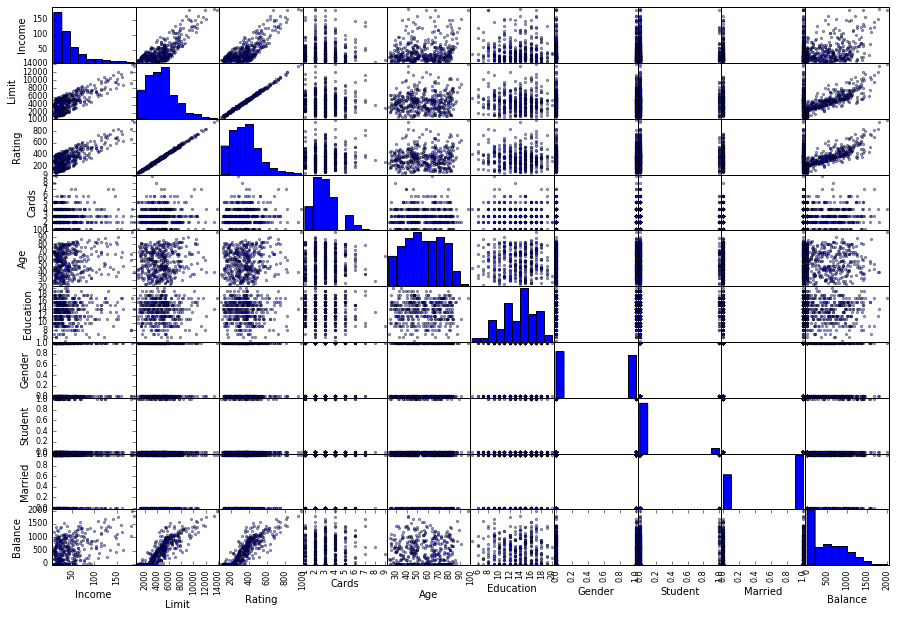

In [8]:
scatter_matrix(df, figsize=(15,10), alpha=.4);

Balance's histogram is not normal. Positively skewed distribution.

In [9]:
df = pd.get_dummies(df, prefix= '', prefix_sep= '', columns=['Ethnicity'])

For educational purposes feature -3 is dropped.

In [10]:
df.drop('African American', axis=1, inplace=True)

In [11]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
1,14.891,3606,283,2,34,11,1,0,1,333,0.0,1.0
2,106.025,6645,483,3,82,15,0,1,1,903,1.0,0.0
3,104.593,7075,514,4,71,11,1,0,0,580,1.0,0.0
4,148.924,9504,681,3,36,11,0,0,0,964,1.0,0.0
5,55.882,4897,357,2,68,16,1,0,1,331,0.0,1.0


---
Defining Functions


In [12]:
def summary_model(X, y, label='scatter'):
    Xc = sm.add_constant(X)
    model = sm.OLS(y, Xc).fit()
    return model.summary()

def plot_model(X, y, label='Residuals - Plot'):
    model = sm.OLS(y, X).fit()
    residuals = model.outlier_test()['student_resid']
    y_hats = model.predict(X)
    
    plt.scatter(y_hats, residuals, alpha = .35, label=label)
    plt.xlabel('Predictions y_hats')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()
    
def feature_test(predict='[Independed_variable]', features=None, data=None):
    y = data[predict]
    x = sm.add_constant(data[features])
    
    model = sm.OLS(y, x)
    fit = model.fit()
    print fit.summary2()
    resid = fit.outlier_test()['student_resid']
    plt.scatter(fit.fittedvalues, resid)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    return fit


def interaction_test(y, x):
    x = sm.add_constant(x)
    
    model=sm.OLS(y, x)
    fit = model.fit()
    print fit.summary2()
    resid = fit.outlier_test()['student_resid']
    plt.scatter(fit.fittedvalues, resid)


In [13]:
X = df.copy()
y = X.pop('Balance')

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 28 Jul 2016   Prob (F-statistic):          1.11e-253
Time:                        13:39:04   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -489.8611     35.801    -13.683      0.0

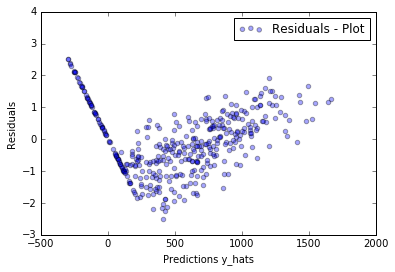

In [14]:
print summary_model(X, y)
plot_model(X,y)

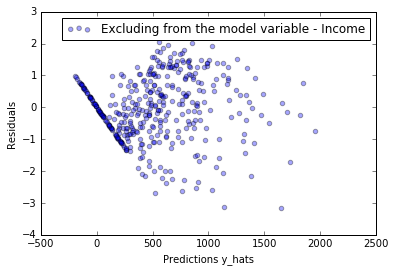

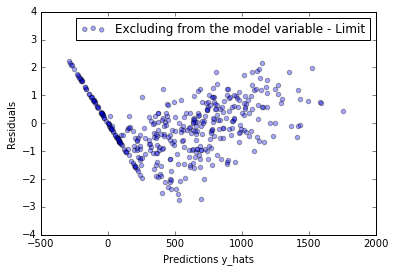

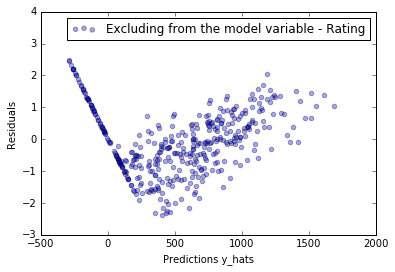

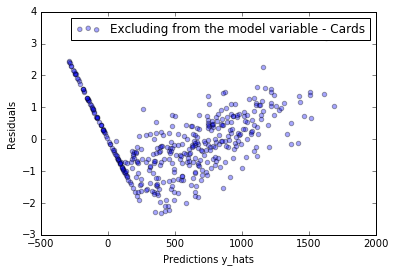

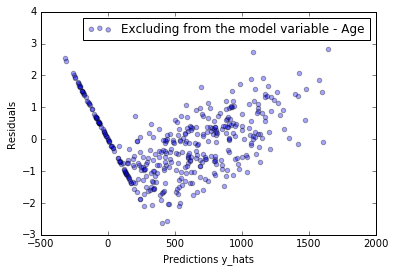

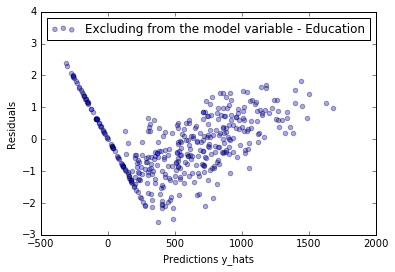

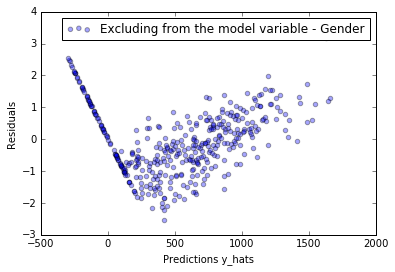

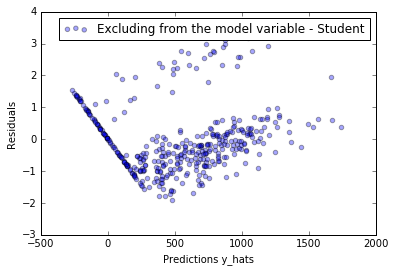

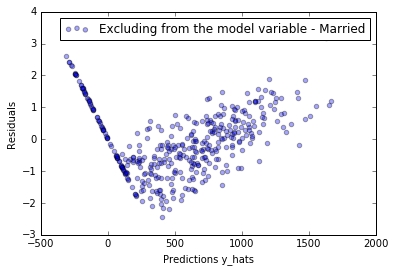

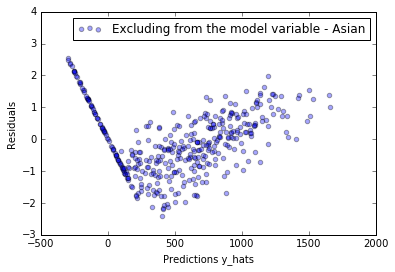

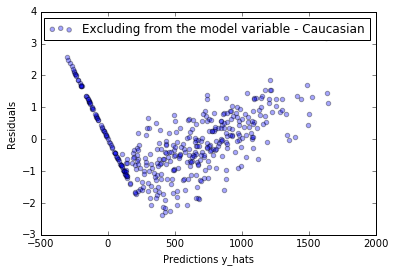

In [15]:
cols = X.columns

for col_name in cols:
    new_lcolumns = list(cols)
    new_lcolumns.remove(col_name)
    plot_model(X[new_lcolumns], y, 'Excluding from the model variable - ' + str(col_name))

Note: Observations are leaned towards zero.

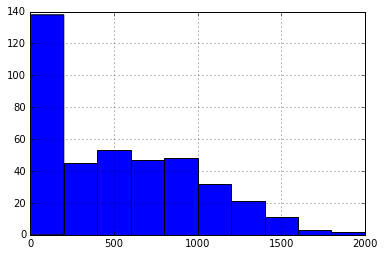

In [16]:
y.hist();


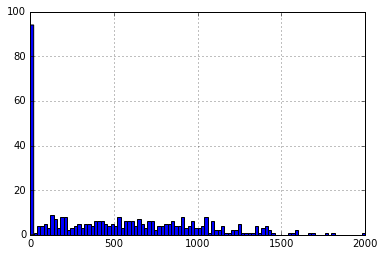

In [17]:
y.hist(bins=100);

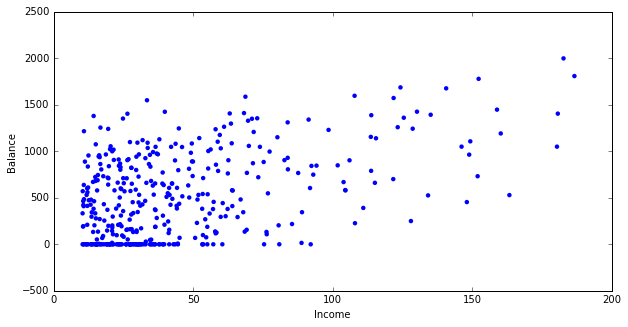

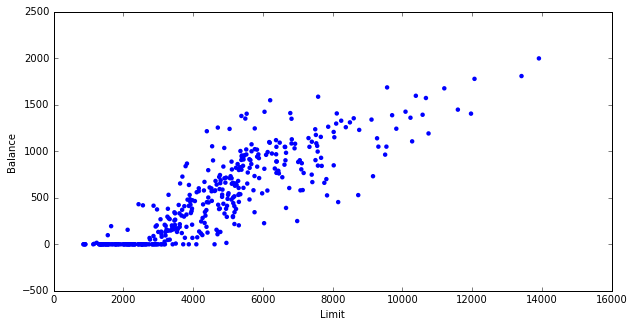

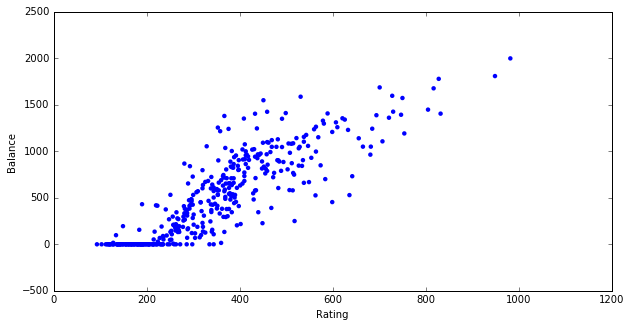

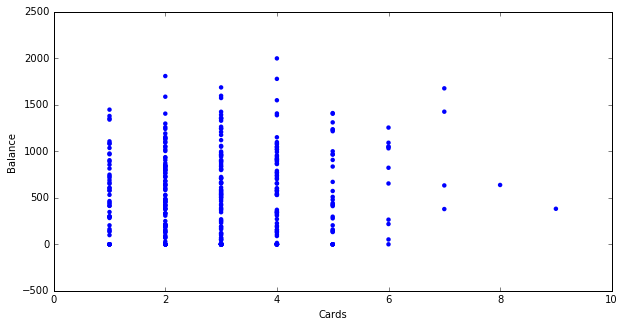

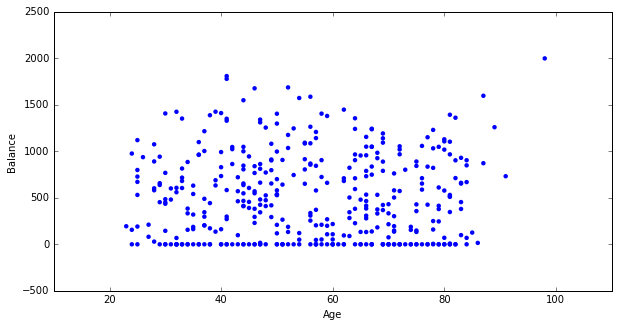

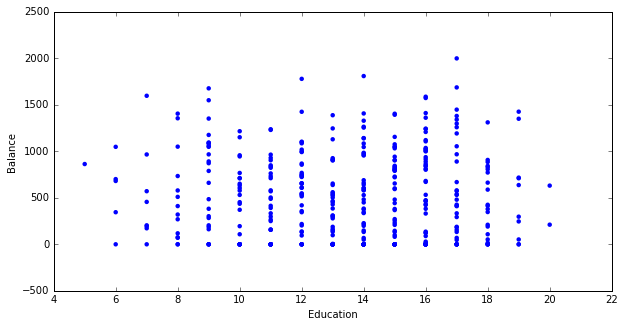

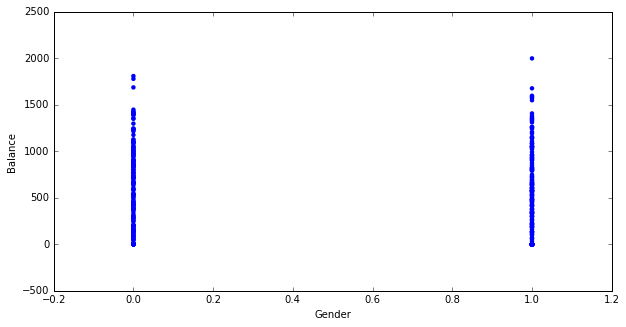

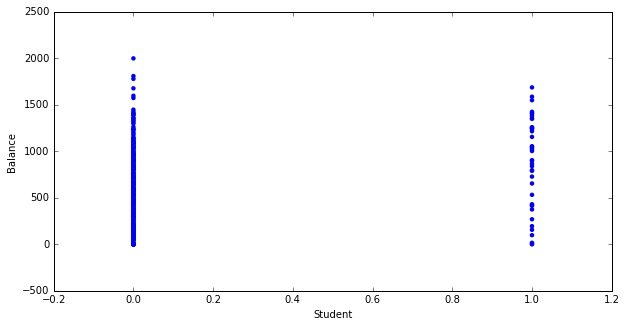

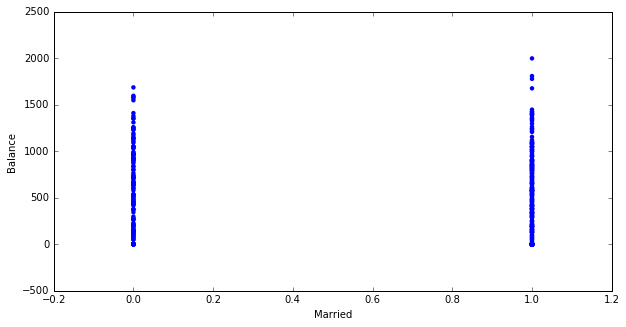

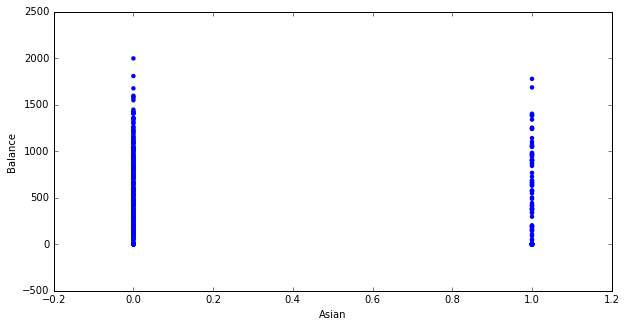

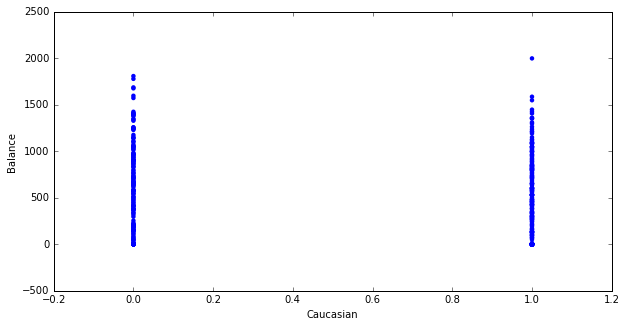

In [18]:
for col in cols:
    df.plot(kind='scatter', y='Balance', x=col, edgecolor='none', figsize=(10, 5))
    plt.xlabel(col)
    plt.ylabel('Balance')
    plt.show()

array([ 1200,  3200,  3300,  3400,  3500,  3600,  3700,  3800,  3900,
        4000,  4100,  4200,  4300,  4400,  4500,  4700,  4800,  4900,
        5000,  5100,  5200,  5300,  5400,  5500,  5600,  5700,  5800,
        5900,  6000,  6100,  6200,  6300,  6400,  6500,  6600,  6700,
        6800,  6900,  7000,  7100,  7200,  7300,  7400,  7500,  7600,
        7700,  7800,  7900,  8000,  8100,  8200,  8300,  8400,  8500,
        8600,  8700,  8800,  8900,  9000,  9100,  9200,  9300,  9400,
        9500,  9600,  9700,  9800,  9900, 10000, 10100, 10200, 10300,
       10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200,
       11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100,
       12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000,
       13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900])

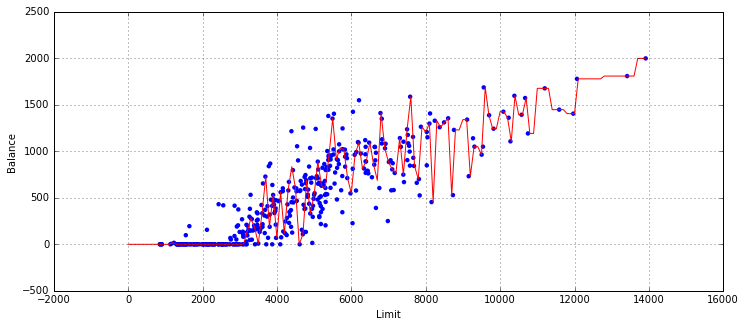

In [19]:

df.plot(kind='scatter', y='Balance', x='Limit', edgecolor='none', figsize=(12, 5))
f = DTR().fit(df[['Limit']], df['Balance'])
xval = np.arange(0, 14000, 100)
pred = [f.predict(v) for v in xval]
plt.plot(xval, pred, 'r-')
plt.grid('on')

xval[np.argwhere(np.array(pred) > 0)[:,0]]


array([190, 220, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340,
       350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470,
       480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600,
       610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730,
       740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860,
       870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990])

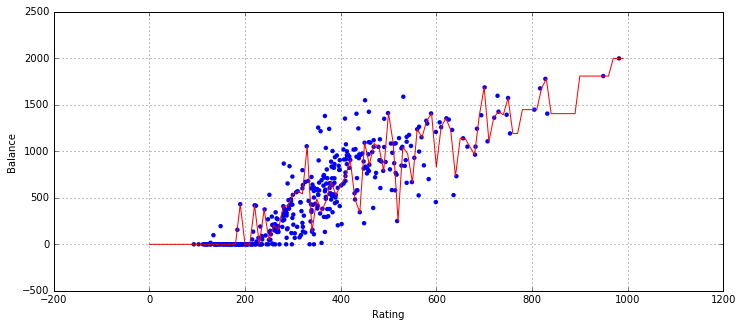

In [20]:

df.plot(kind='scatter', y='Balance', x='Rating', edgecolor='none', figsize=(12, 5))
f = DTR().fit(df[['Rating']], df['Balance'])
xval = np.arange(0, 1000, 10)
pred = [f.predict(v) for v in xval]
plt.plot(xval, pred, 'r-')
plt.grid('on')

xval[np.argwhere(np.array(pred) > 0)[:,0]]


Once I've found the relevant variables, let's obtain a threshold that would give you reasonable separation between the zero and non-zero observation, for example: minimize false positives and false negative predictions. I can choose the threshold by a visual inspection on my plot. To be fancy we can obtain the threshold utilizing the more sophisticate model decision tree.


In [21]:
df[:2]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
1,14.891,3606,283,2,34,11,1,0,1,333,0.0,1.0
2,106.025,6645,483,3,82,15,0,1,1,903,1.0,0.0


In [22]:
limit_threshold = (df.Limit >= 3300) & (df.Rating >=250)
df_threshold = df[limit_threshold]

This is an atypical first step for linear regression but works well in this situation because we have a large loading of 0 observations in our response, which are affecting the regression fit. In essence, we are fitting two models, one feeding into the other. The first model simply predicts 0 or non-zero balance based on a single feature, the second model predicts the balance given that the first model predicted non-zero balance.

In [23]:
X_new = df_threshold.copy()
y_new = X_new.pop('Balance')

In [24]:
X_new.columns
all_features= [u'Income', u'Limit', u'Rating', u'Cards', u'Age', u'Education',
       u'Gender', u'Student', u'Married', u'Asian', u'Caucasian']

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998    
Dependent Variable: Balance          AIC:                2463.9169
Date:               2016-07-28 13:39 BIC:                2507.6623
No. Observations:   283              Log-Likelihood:     -1220.0  
Df Model:           11               F-statistic:        1.242e+04
Df Residuals:       271              Prob (F-statistic): 0.00     
R-squared:          0.998            Scale:              339.36   
------------------------------------------------------------------
             Coef.   Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      -680.5602   8.1486  -83.5189 0.0000 -696.6028 -664.5176
Income       -9.7698   0.0511 -191.1438 0.0000   -9.8704   -9.6691
Limit         0.3253   0.0073   44.6649 0.0000    0.3109    0.3396
Rating       -0.0517   0.1076   -0.4800 0.6316   -0.2636    0.1603
Cards       

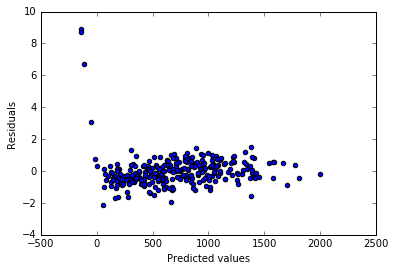

In [25]:
feature_test(predict='Balance', features=all_features, data=df_threshold)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Thu, 28 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:39:33   Log-Likelihood:                -1220.0
No. Observations:                 283   AIC:                             2464.
Df Residuals:                     271   BIC:                             2508.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -680.5602      8.149    -83.519      0.0

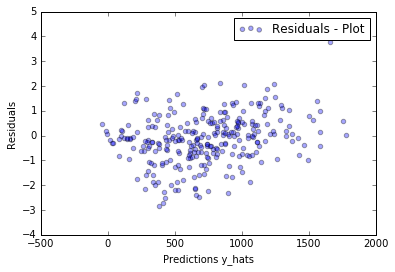

In [26]:
print summary_model(X_new, y_new)
plot_model(X_new, y_new)


### Feature Engineering - Using adjusted R^2 or F-tests and VIF to detect multicollinearity.


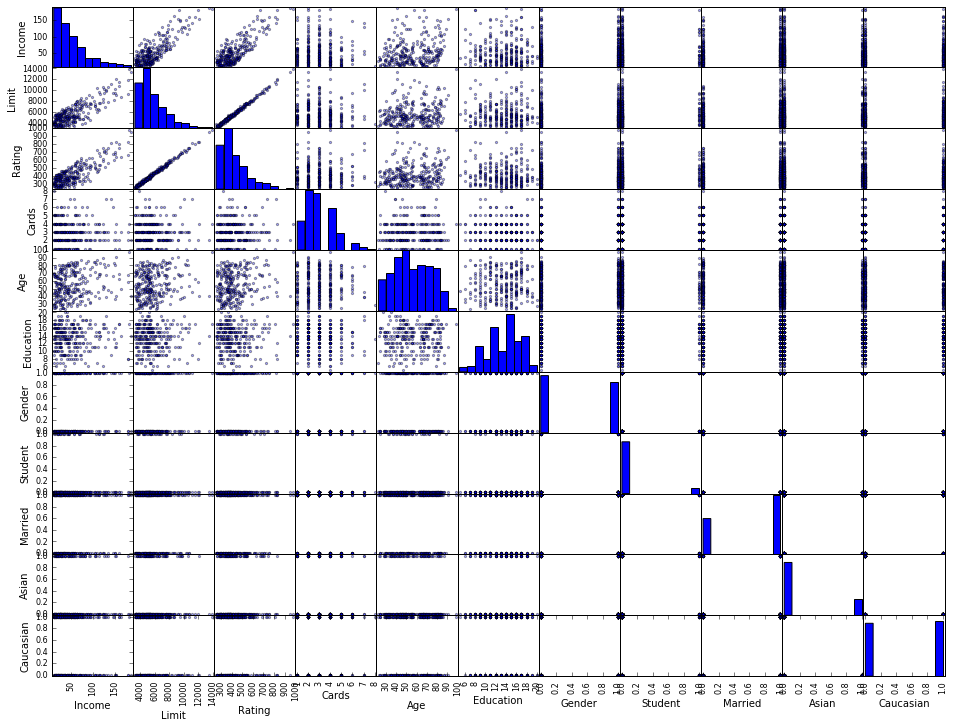

In [27]:
scatter_matrix(X_new, figsize=(16,12), alpha=.36);

In [28]:
X_new[:2].T

,1,2
Income,14.891,106.025
Limit,3606.000,6645.000
Rating,283.000,483.000
Cards,2.000,3.000
Age,34.000,82.000
Education,11.000,15.000
Gender,1.000,0.000
Student,0.000,1.000
Married,1.000,1.000
Asian,0.000,1.000


In [29]:
matrizhecf = X_new.as_matrix(columns=all_features)

pretty = PrettyTable(['Field', 'VIF'])
for i in xrange(matrizhecf.shape[1]):
    pretty.add_row((X_new.columns[i], VIF(matrizhecf, i)))

print pretty

+-----------+---------------+
|   Field   |      VIF      |
+-----------+---------------+
|   Income  | 8.60549649292 |
|   Limit   | 1523.43414888 |
|   Rating  | 1700.15208392 |
|   Cards   | 7.65194459789 |
|    Age    | 10.0537686545 |
| Education | 12.9892704528 |
|   Gender  | 1.86576090354 |
|  Student  | 1.16662937378 |
|  Married  | 2.82847957562 |
|   Asian   | 1.92414916268 |
| Caucasian | 2.91023830966 |
+-----------+---------------+


Let's remove the major offender

Rating  |  1597.485766


In [30]:
X_new1 = X_new.copy()
X_new1.pop('Rating')
X_new1[:2].T

,1,2
Income,14.891,106.025
Limit,3606.000,6645.000
Cards,2.000,3.000
Age,34.000,82.000
Education,11.000,15.000
Gender,1.000,0.000
Student,0.000,1.000
Married,1.000,1.000
Asian,0.000,1.000
Caucasian,1.000,0.000


In [31]:
X_new1.columns


Index([u'Income', u'Limit', u'Cards', u'Age', u'Education', u'Gender',
       u'Student', u'Married', u'Asian', u'Caucasian'],
      dtype='object')

In [32]:
features_1= [u'Income', u'Limit', u'Cards', u'Age', u'Education', u'Gender',
       u'Student', u'Married', u'Asian', u'Caucasian']

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998    
Dependent Variable: Balance          AIC:                2462.1574
Date:               2016-07-28 13:40 BIC:                2502.2573
No. Observations:   283              Log-Likelihood:     -1220.1  
Df Model:           10               F-statistic:        1.370e+04
Df Residuals:       272              Prob (F-statistic): 0.00     
R-squared:          0.998            Scale:              338.40   
------------------------------------------------------------------
             Coef.   Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      -681.8125   7.7086  -88.4479 0.0000 -696.9887 -666.6363
Income       -9.7704   0.0510 -191.4853 0.0000   -9.8708   -9.6699
Limit         0.3218   0.0010  320.4670 0.0000    0.3198    0.3238
Cards        25.0711   0.7929   31.6205 0.0000   23.5102   26.6321
Age         

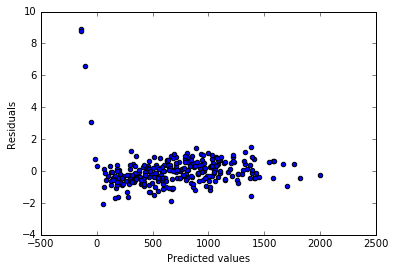

In [33]:
feature_test(predict='Balance', features=features_1, data=df_threshold)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.370e+04
Date:                Thu, 28 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:40:08   Log-Likelihood:                -1220.1
No. Observations:                 283   AIC:                             2462.
Df Residuals:                     272   BIC:                             2502.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -681.8125      7.709    -88.448      0.0

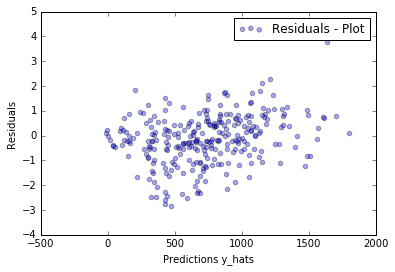

In [34]:
print summary_model(X_new1, y_new)
plot_model(X_new1, y_new)

In [35]:
matriz1 = X_new1.as_matrix(columns=features_1)

pretty1 = PrettyTable(['Field', 'VIF'])
for i in xrange(matriz1.shape[1]):
    pretty1.add_row((X_new1.columns[i], VIF(matriz1, i)))

print pretty1

+-----------+---------------+
|   Field   |      VIF      |
+-----------+---------------+
|   Income  | 8.55408961816 |
|   Limit   | 24.8284155046 |
|   Cards   | 5.00612445925 |
|    Age    | 9.83251482975 |
| Education | 12.7272156407 |
|   Gender  | 1.86489317378 |
|  Student  | 1.15078610515 |
|  Married  | 2.74929073603 |
|   Asian   |  1.923508077  |
| Caucasian | 2.87932422044 |
+-----------+---------------+


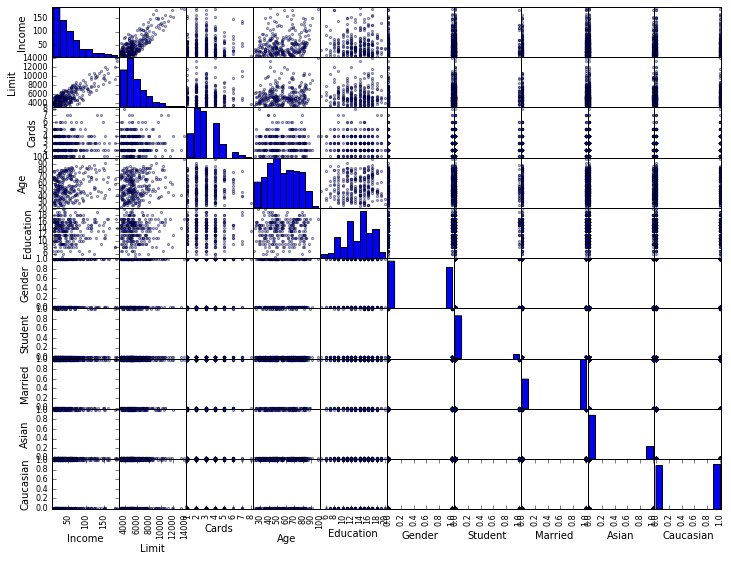

In [36]:
scatter_matrix(X_new1, figsize=(12, 9), alpha=.35);

VIF and the scatter_matrix graph help me to confirm that feature 'Rating' was collinear with income.

---
Now let's remove the features with the P-value > 0.05
[u'Education', u'Gender', u'Married', u'Asian', u'Caucasian']

In [37]:
drop_f = [u'Education', u'Gender', u'Married', u'Asian', u'Caucasian']

In [38]:
X_new2 = X_new1.copy()

In [39]:
X_new2.drop(drop_f, axis=1, inplace=True)

In [40]:
X_new2.columns
features_3 = [u'Income', u'Limit', u'Cards', u'Age', u'Student']

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998    
Dependent Variable: Balance          AIC:                2458.2605
Date:               2016-07-28 13:40 BIC:                2480.1332
No. Observations:   283              Log-Likelihood:     -1223.1  
Df Model:           5                F-statistic:        2.731e+04
Df Residuals:       277              Prob (F-statistic): 0.00     
R-squared:          0.998            Scale:              339.54   
------------------------------------------------------------------
             Coef.   Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      -681.3213   5.6826 -119.8967 0.0000 -692.5078 -670.1348
Income       -9.7743   0.0510 -191.5242 0.0000   -9.8748   -9.6739
Limit         0.3218   0.0010  320.3256 0.0000    0.3199    0.3238
Cards        25.0988   0.7910   31.7289 0.0000   23.5416   26.6560
Age         

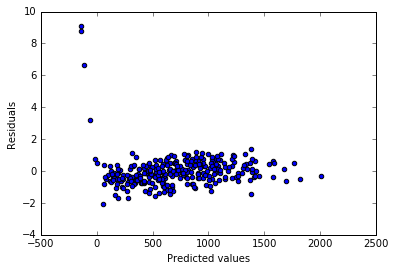

In [41]:
feature_test(predict='Balance', features=features_3, data=df_threshold)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.731e+04
Date:                Thu, 28 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:40:39   Log-Likelihood:                -1223.1
No. Observations:                 283   AIC:                             2458.
Df Residuals:                     277   BIC:                             2480.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -681.3213      5.683   -119.897      0.0

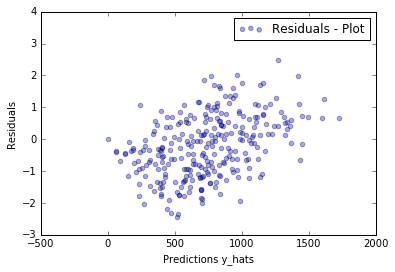

In [42]:
print summary_model(X_new2, y_new)
plot_model(X_new2, y_new)

In [43]:
matriz2 = X_new1.as_matrix(columns=features_3)

pretty2 = PrettyTable(['Field', 'VIF'])
for i in xrange(matriz2.shape[1]):
    pretty2.add_row((X_new2.columns[i], VIF(matriz2, i)))

print pretty2

+---------+---------------+
|  Field  |      VIF      |
+---------+---------------+
|  Income | 7.66206280103 |
|  Limit  | 18.9566217605 |
|  Cards  |  4.7568459366 |
|   Age   | 7.89226933293 |
| Student | 1.10286059422 |
+---------+---------------+


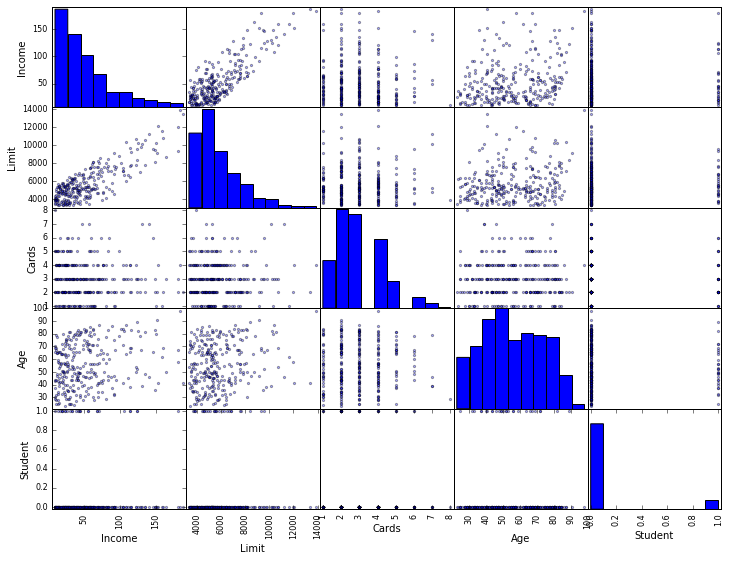

In [44]:
scatter_matrix(X_new2, figsize=(12, 9), alpha=.35);

Now I'm done engineering my features

Features: [u'Income', u'Limit', u'Cards', u'Age', u'Student']

---

Generally, there is no defined end to the modeling process so this step can take as long as you would like. At some point you just have to stop!
